<a href="https://colab.research.google.com/github/rcarasek/Python-for-Investment/blob/main/Python_For_FinanceBovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# import libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


In [114]:
ativosCod = ['ITSA4.SA', 'BBAS3.SA', 'PETR4.SA', 'VALE3.SA', 'lame4.sa']
DataInicioCotacao = '2013-01-01'
hoje = datetime.today().strftime('%Y-%m-%d')
print(hoje)
print(type(ativosCod))

2021-05-17
<class 'list'>


In [115]:
# pegar a quantidade de ativos na lista ativosCod
numAtivos = len(ativosCod)
if numAtivos == 0:
  print('não temos ativos na lista')
elif numAtivos == 1:
  print('temos 1 ativo na lista')
else:
  print('Temos ' + str(numAtivos) + ' ativos na lista')

ativosCod

Temos 5 ativos na lista


['ITSA4.SA', 'BBAS3.SA', 'PETR4.SA', 'VALE3.SA', 'lame4.sa']

In [116]:
# criando uma função para pegar os preços dos ativos
def PegaCotacaoMeuPortfolio(stocks = ativosCod , start = DataInicioCotacao , end = hoje, col = 'Adj Close'):
  dados = web.DataReader(stocks, data_source='yahoo', start=DataInicioCotacao, end=hoje )[col]
  return dados

In [117]:
# pegando informações do portfolio de ativos
meusAtivos = PegaCotacaoMeuPortfolio(ativosCod)
meusAtivos

Symbols,ITSA4.SA,BBAS3.SA,PETR4.SA,VALE3.SA,lame4.sa
Date,,,,,
2013-01-02,3.974614,15.510180,16.259821,31.167551,10.699188
2013-01-03,4.101423,15.816780,16.846132,30.637491,10.699188
2013-01-04,4.081606,15.624401,16.870909,30.163973,10.699188
2013-01-07,4.030092,15.720593,16.581882,29.570311,10.699188
2013-01-08,4.057832,15.900935,16.102922,29.337074,10.699188
...,...,...,...,...,...
2021-05-11,10.450000,30.549999,25.150000,118.720001,19.600000
2021-05-12,10.250000,30.350000,24.780001,114.330002,19.340000
2021-05-13,10.430000,31.160000,24.990000,112.489998,19.430000


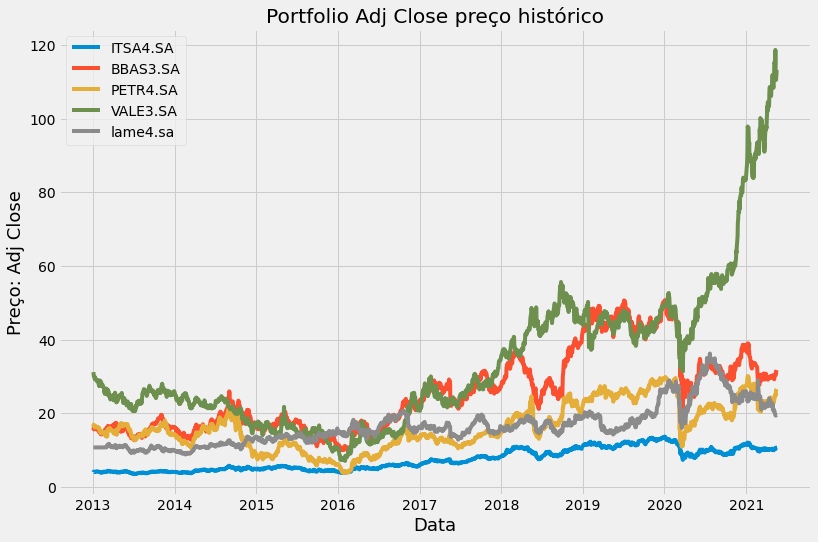

In [120]:
# criando uma função para visualizar o portfolio


def MostraGrafico(stocks=ativosCod , start=DataInicioCotacao , end=hoje , col='Adj Close'):
  # titulo para o grafico
  tituloGrafico = 'Portfolio ' + col + ' preço histórico'

  # pegando as cotaçoes do meu portfolio
  meusAtivos = PegaCotacaoMeuPortfolio(stocks=stocks, start=start, end=end, col=col)

  plt.figure(figsize=(12,8))

  # loop pelos ativos da lista 
  for c in meusAtivos.columns.values:
    plt.plot(meusAtivos[c], label = c)

  plt.title(tituloGrafico)
  plt.xlabel('Data', fontsize = 18)
  plt.ylabel('Preço: ' + col , fontsize = 18)
  plt.legend(meusAtivos.columns.values, loc='upper left')
  plt.show()


MostraGrafico(ativosCod)